In [2]:
library("igraph")
library(hash)

options(scipen=999)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union

hash-2.2.6 provided by Decision Patterns



In [2]:
# 8.1: In each community determine the most dominant genre based simply on frequency counts.
# Which generes tend to be the most frequent dominant ones across communities and why?

In [3]:
weighted_movie_g = read_graph("project4_data/q6_movies_weighted.txt",format="ncol", directed = FALSE)



In [4]:
load(file = "q7_cluster_fast_greedy.rda")

In [5]:
genre_hash = hash()
genre_file = file('project4_data/movie_genre_fixed.txt','r')
while(TRUE){
    line = readLines(genre_file,  n=1)
    if(length(line) == 0){break}
    arr = strsplit(line, "[\t\t]")
    
    .set(genre_hash, arr[[1]][1], arr[[1]][3])
}

In [6]:
movie_hash = hash()
index_file = file('project4_data/index_movies_list.txt', 'r')
index = 0
while(TRUE){
    line = readLines(index_file, n=1)
    if(length(line) == 0){break}
    
    .set(movie_hash, index, substr(line, start = 11, stop = nchar(line)))
    index = index + 1
}

In [7]:

# need to put movie list into a list... might be a helper method to do in hash library
movie_list_whole = c()
for (m_i in 1:length(movie_hash)){
    movie_name = movie_hash[[as.character(m_i)]]
    movie_list_whole = c(movie_list_whole,movie_name)
    
}


In [8]:
# q(i) is fraction of genre in entire dataset

whole_genre = hash()

for (m_i in movie_list_whole){
    genre = genre_hash[[m_i]]
#     print(genre)
    if(!is.null(genre)){
        if(!is.null(genre)){
            if(is.null(whole_genre[[genre]])){
                .set(whole_genre, genre, 0)
            }
            .set(whole_genre, genre, whole_genre[[genre]] + 1)
        }
    }
}


In [9]:
genre_list = c(
'Documentary',
'Music',
'Comedy',
'Drama',
'Thriller',
'Crime',
'Romance',
'Action',
'Fantasy',
'History',
'Sci-Fi',
'Western',
'Musical',
'News',
'Sport',
'Horror',
'Family',
'Adventure',
'War',
'Short',
'Animation',
'Adult',
'Mystery',
'Biography',
'Talk-Show',
'Film-Noir',
'Reality-TV',
'Game-Show'
)




In [10]:
# 8.1, 8.2

for (c in 1:length(fg)){# length(fg)
    c_i = hash() # for 8.1
    p_i = hash() # for 8.2
    
    modified_dominant = hash()
    
    
    community = fg[[c]]
    
    for(m in community){
        movie = movie_hash[[m]]
        genre = genre_hash[[movie]]
        
        
        if(!is.null(genre)){
            
            if (is.null(c_i[[genre]])){
                .set(c_i, genre, 0)
            }
            .set(c_i, genre, c_i[[genre]] +1)
            
            
            if(is.null(p_i[[genre]])){
                #p_i is fraction of genre i movies in the community
                .set(p_i, genre, 0 / length(community)) 
            }
            .set(p_i, genre, p_i[[genre]] + 1/length(community))
        }
             
    }
    
    print(paste('=== Community c_i', c))
    # 8.1
    print(c_i)
    
    
    # 8.2
    print(paste('======= 8.2 ========'))
    for (l in genre_list){
#         print(l)
        if(is.null(modified_dominant[[l]])){
            if ((!is.null(c_i[[l]])) && !is.null(p_i[[l]]) && !is.null(whole_genre[[l]])){
#                 print(c_i[[l]])
#                 print(p_i[[l]])
#                 print(whole_genre[[l]])
                .set(modified_dominant, l, log(c_i[[l]]) *(p_i[[l]])/(whole_genre[[l]]))                
            }
        }
    }
    
    print(modified_dominant)
}




[1] "=== Community c_i 1"
<hash> containing 28 key-value pair(s).
  Action : 813
  Adult : 60
  Adventure : 471
  Animation : 272
  Biography : 34
  Comedy : 3993
  Crime : 733
  Documentary : 1211
  Drama : 8045
  Family : 863
  Fantasy : 909
  Film-Noir : 3
  Game-Show : 5
  History : 323
  Horror : 1534
  Music : 691
  Musical : 477
  Mystery : 838
  News : 29
  Reality-TV : 5
  Romance : 3513
  Sci-Fi : 1825
  Short : 5682
  Sport : 772
  Talk-Show : 3
  Thriller : 7270
  War : 998
  Western : 457
[1] "======= 8.2 ========"
<hash> containing 28 key-value pair(s).
  Action : 0.00003316414
  Adult : 0.000002322515
  Adventure : 0.00002947751
  Animation : 0.00009468099
  Biography : 0.00001789651
  Comedy : 0.00003941985
  Crime : 0.00003868167
  Documentary : 0.0001041568
  Drama : 0.00004052357
  Family : 0.00004198199
  Fantasy : 0.00005659115
  Film-Noir : 0.0000003725511
  Game-Show : 0.0000312306
  History : 0.00002807181
  Horror : 0.00007551286
  Music : 0.00007821632
  Music

In [11]:
community_15_20 = c()
for (i in 1:length(fg)){
    c_size = length(fg[[i]])
    if (c_size >= 10 && c_size <= 20){
        community_15_20 = c(community_15_20, i)
        print(paste('Community',i, c_size))

    }
}

[1] "Community 22 15"
[1] "Community 24 15"
[1] "Community 26 14"
[1] "Community 27 12"


In [12]:
# get movie actor
movie_actors = hash()

movie_file = file('project4_data/q1_cleansed.txt','r')
while(TRUE){
    line = readLines(movie_file,  n=1)
    if(length(line) == 0){break}
    arr = strsplit(line, "[\t\t]")
    actor = arr[[1]][1]
    
    for (t in arr[[1]]){
        if (t != ""){
            if (is.null(movie_actors[[t]])){
                .set(movie_actors, t, c(actor))
            }
            else{
                .set(movie_actors, t, c(movie_actors[[t]], actor))
            }            
        }
    }
}


In [13]:
# get movie index
movie_ids = hash()
index = 0
movie_id_file = file('project4_data/index_movies_list.txt','r')
while(TRUE){
    line = readLines(movie_id_file, n=1)
    if(length(line) == 0){break}
    
    .set(movie_ids, substr(line, start = 11, stop = nchar(line)), index)
    index = index + 1
}


In [14]:
#get actor ids
actor_ids = hash()
index = 0
actor_id_file = file('project4_data/index_name_list.txt','r')
while(TRUE){
    line = readLines(actor_id_file, n=1)
    if(length(line) == 0){break}
    
    .set(actor_ids, substr(line, start = 11, stop = nchar(line)), index)
    index = index + 1
}

In [15]:
movie_actors[['BilkrasjKavalkade (2004)']]

[1] "Egeland, Preben"     "Jordell, Fredrik"    "Lislevand, Truls"   
[4] "Nordland, Bjørn Ove" "Sethre, Jon"         "Væting, Rune"

In [16]:
movie_ids[['BilkrasjKavalkade (2004)']]

[1] 146873

[1] "===== Community 22"
[1] "===== Community 24"


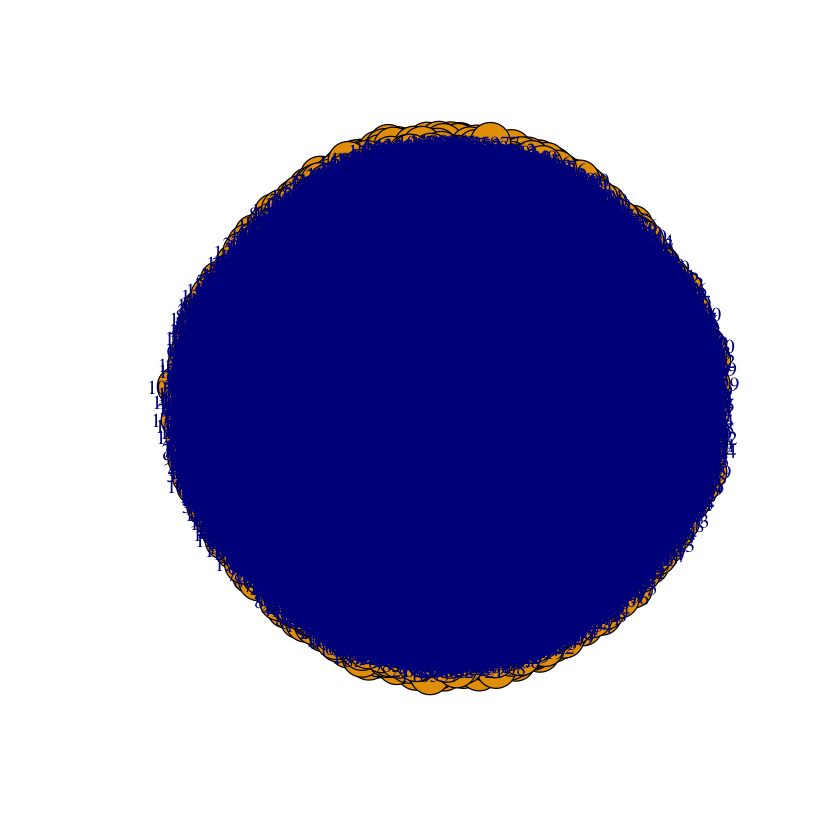

[1] "===== Community 26"


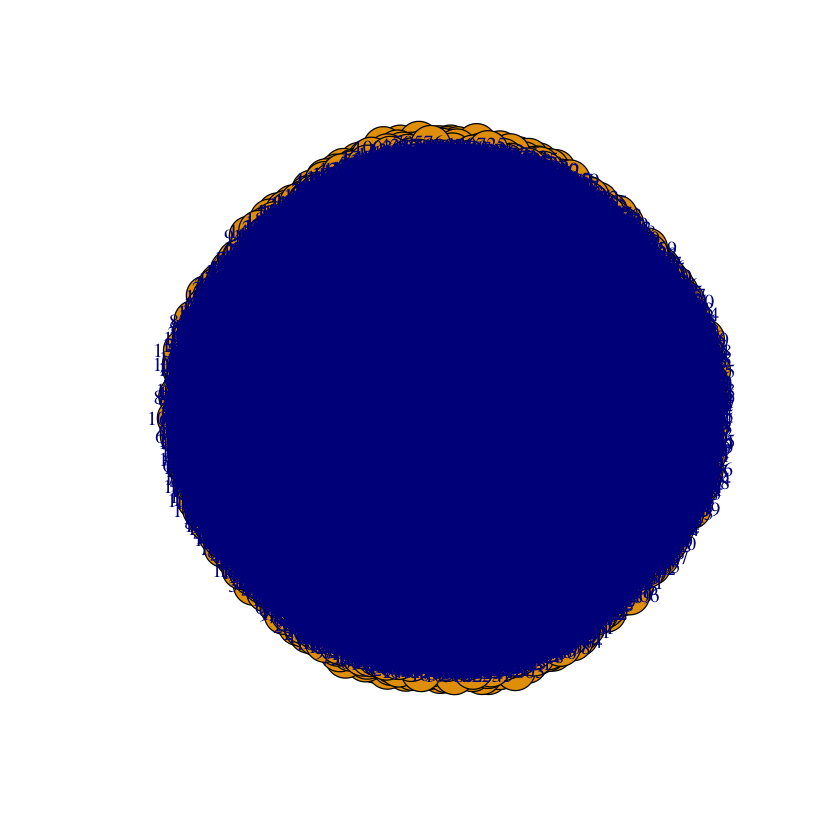

[1] "===== Community 27"


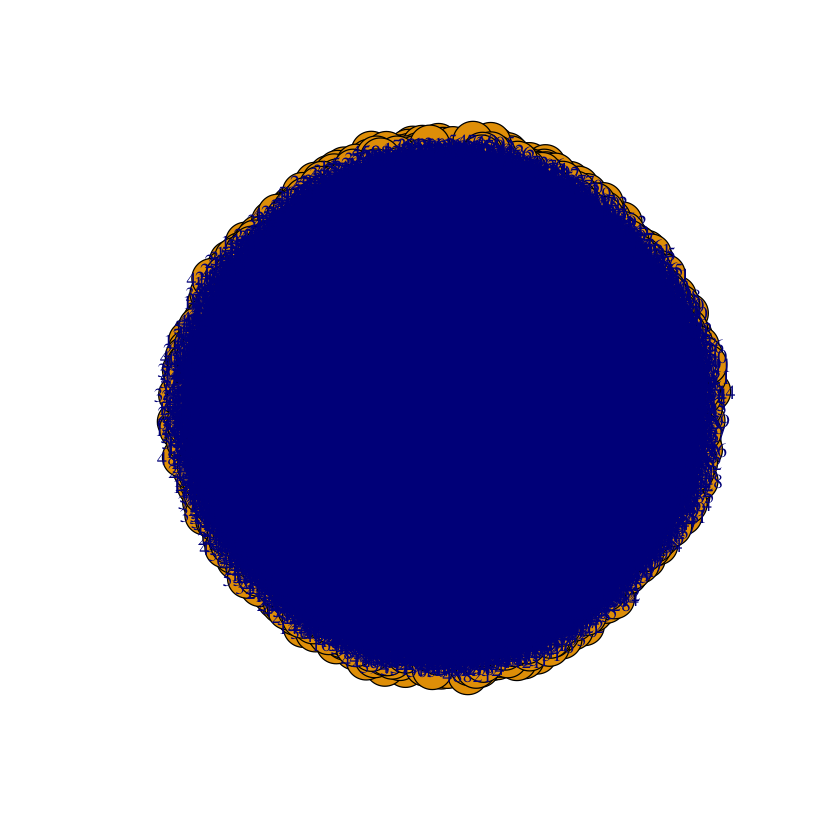

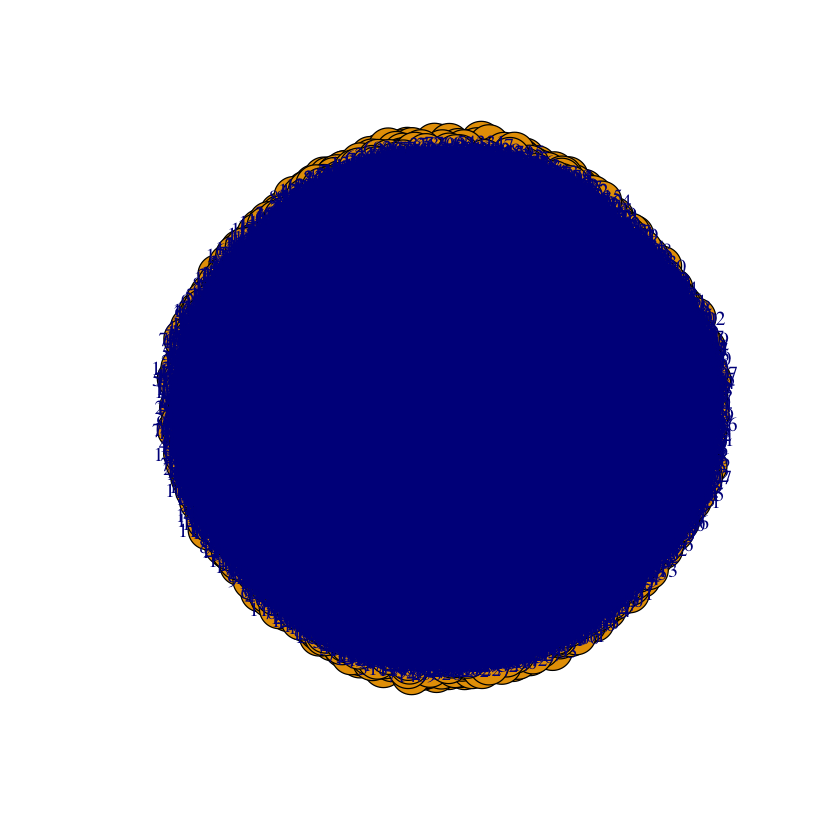

In [18]:
# just gonna take community 22 since problem does not specify which one..

for (comm in community_15_20){
    print(paste('===== Community', comm))
    community = fg[[comm]]
    
#     bipartite_edge_list = matrix(bipartite_edge_list, nc=2, byrow=TRUE)
    
    bipartite_edge_list = c()
    for (c in community){
        movie = movie_hash[[c]]
        movie_id = movie_ids[[movie]]
        actors = movie_actors[[movie]]
        
#         print(movie_id)
#         print(movie)
#         print(actors)
        
#         g = make_empty_graph(n=0, directed=FALSE)
        bipartite_edge_list = c()

        actor_list = c()
        for (actor in actors){
            actor_id = actor_ids[[actor]]
#             print(movie_id)
#             print(actor_id)
            bipartite_edge_list = c(bipartite_edge_list, movie_id, actor_id)
            
        }


    }
        bipartite_edge_list = matrix(bipartite_edge_list, nc=2, byrow=TRUE)
        
        bipartite = graph_from_edgelist(bipartite_edge_list, directed=FALSE)
        
        plot(bipartite)
    
    
}

